# Bar data

In [1]:
from ib_insync import *
util.startLoop()

ib = IB()
ib.connect('127.0.0.1', 4002, clientId=14)

<IB connected to 127.0.0.1:4002 clientId=14>

Error 354, reqId 4: Requested market data is not subscribed.Delayed market data is available.Error&BEST/STK/Top&BEST/STK/Top, contract: Stock(symbol='AAPL', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS')
Error 162, reqId 5: Historical Market Data Service error message:No market data permissions for ISLAND STK. Requested market data requires additional subscription for API. See link in 'Market Data Connections' dialog for more details., contract: Stock(symbol='AAPL', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS')
Error 162, reqId 6: Historical Market Data Service error message:API historical data query cancelled: 6


RealTimeBar(time=datetime.datetime(2024, 7, 31, 21, 29, tzinfo=datetime.timezone.utc), endTime=-1, open_=1.082725, high=1.082725, low=1.082725, close=1.082725, volume=-1.0, wap=-1.0, count=-1)
RealTimeBar(time=datetime.datetime(2024, 7, 31, 21, 29, 5, tzinfo=datetime.timezone.utc), endTime=-1, open_=1.082725, high=1.082725, low=1.082725, close=1.082725, volume=-1.0, wap=-1.0, count=-1)
RealTimeBar(time=datetime.datetime(2024, 7, 31, 21, 29, 10, tzinfo=datetime.timezone.utc), endTime=-1, open_=1.082725, high=1.082725, low=1.08272, close=1.08272, volume=-1.0, wap=-1.0, count=-1)
RealTimeBar(time=datetime.datetime(2024, 7, 31, 21, 29, 15, tzinfo=datetime.timezone.utc), endTime=-1, open_=1.08272, high=1.08272, low=1.08272, close=1.08272, volume=-1.0, wap=-1.0, count=-1)
RealTimeBar(time=datetime.datetime(2024, 7, 31, 21, 29, 20, tzinfo=datetime.timezone.utc), endTime=-1, open_=1.08272, high=1.08273, low=1.08272, close=1.08273, volume=-1.0, wap=-1.0, count=-1)
RealTimeBar(time=datetime.date

Error 10089, reqId 10: Requested market data requires additional subscription for API. See link in 'Market Data Connections' dialog for more details., contract: Stock(symbol='AAPL', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS')


RealTimeBar(time=datetime.datetime(2024, 7, 31, 21, 30, tzinfo=datetime.timezone.utc), endTime=-1, open_=1.082725, high=1.082735, low=1.08272, close=1.08272, volume=-1.0, wap=-1.0, count=-1)
RealTimeBar(time=datetime.datetime(2024, 7, 31, 21, 30, tzinfo=datetime.timezone.utc), endTime=-1, open_=1.082725, high=1.082735, low=1.08272, close=1.08272, volume=-1.0, wap=-1.0, count=-1)
RealTimeBar(time=datetime.datetime(2024, 7, 31, 21, 30, 5, tzinfo=datetime.timezone.utc), endTime=-1, open_=1.08272, high=1.08272, low=1.08272, close=1.08272, volume=-1.0, wap=-1.0, count=-1)
RealTimeBar(time=datetime.datetime(2024, 7, 31, 21, 30, 5, tzinfo=datetime.timezone.utc), endTime=-1, open_=1.08272, high=1.08272, low=1.08272, close=1.08272, volume=-1.0, wap=-1.0, count=-1)
RealTimeBar(time=datetime.datetime(2024, 7, 31, 21, 30, 10, tzinfo=datetime.timezone.utc), endTime=-1, open_=1.08272, high=1.08272, low=1.08272, close=1.08272, volume=-1.0, wap=-1.0, count=-1)
RealTimeBar(time=datetime.datetime(2024, 

Peer closed connection.


## Historical data

To get the earliest date of available bar data the "head timestamp" can be requested:

In [17]:
contract = Stock(symbol='AAPL', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS')

ib.reqHeadTimeStamp(contract, whatToShow='TRADES', useRTH=True)

datetime.datetime(1980, 12, 12, 14, 30)

In [3]:
contract

Stock(symbol='AAPL', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS')

In [4]:
ib.reqMktData(contract, '', False, False)

Ticker(contract=Stock(symbol='AAPL', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS'))

In [5]:
ticker = ib.ticker(contract)
ib.sleep(2)

ticker

Ticker(contract=Stock(symbol='AAPL', exchange='SMART', primaryExchange='NASDAQ', currency='USD', localSymbol='AAPL', tradingClass='NMS'))

In [6]:
ticker.marketPrice()

nan

To request hourly data of the last 60 trading days:

In [7]:
bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='60 D',
        barSizeSetting='1 hour',
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=1)

In [8]:
bars[0]

IndexError: list index out of range

Convert the list of bars to a data frame and print the first and last rows:

In [9]:
df = util.df(bars)

display(df.head())
display(df.tail())

AttributeError: 'NoneType' object has no attribute 'head'

Instruct the notebook to draw plot graphics inline:

In [6]:
%matplotlib inline

Plot the close data

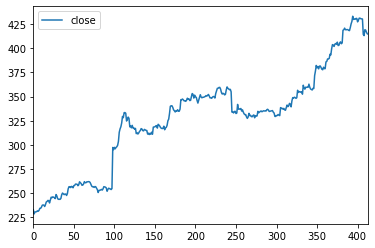

In [7]:
df.plot(y='close');

There is also a utility function to plot bars as a candlestick plot. It can accept either a DataFrame or a list of bars. Here it will print the last 100 bars:

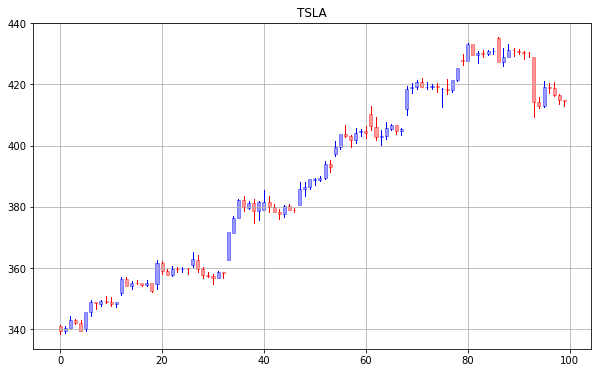

In [8]:
util.barplot(bars[-100:], title=contract.symbol);

## Historical data with realtime updates

A new feature of the API is to get live updates for historical bars. This is done by setting `endDateTime` to an empty string and the `keepUpToDate` parameter to `True`.

Let's get some bars with an keepUpToDate subscription:

In [20]:
contract = Forex('EURUSD')

bars = ib.reqHistoricalData(
        contract,
        endDateTime='',
        durationStr='900 S',
        barSizeSetting='10 secs',
        whatToShow='MIDPOINT',
        useRTH=True,
        formatDate=1,
        keepUpToDate=True)

Replot for every change of the last bar:

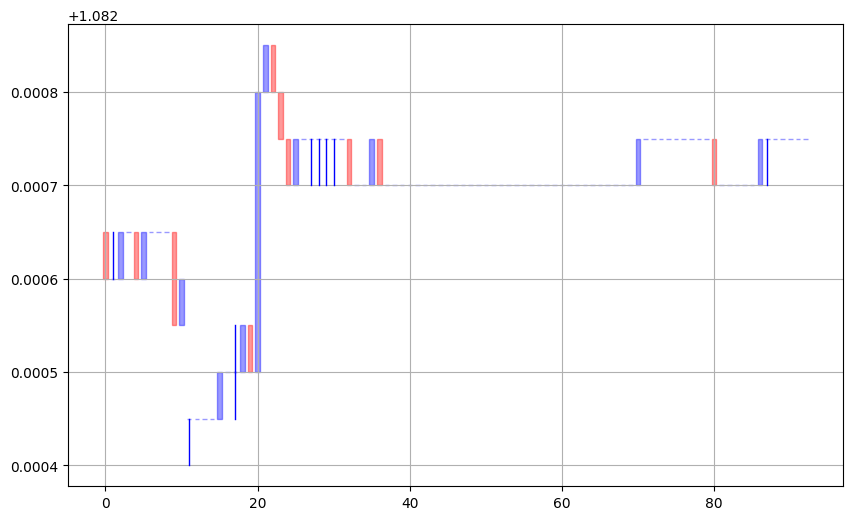

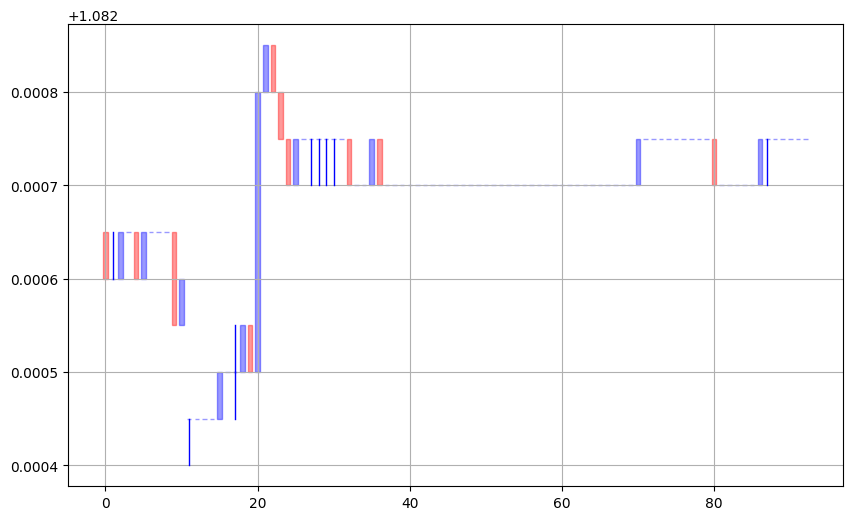

In [11]:
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

def onBarUpdate(bars, hasNewBar):
    plt.close()
    plot = util.barplot(bars)
    clear_output(wait=True)
    display(plot)

bars.updateEvent += onBarUpdate

ib.sleep(10)
ib.cancelHistoricalData(bars)

Realtime bars
------------------

With ``reqRealTimeBars`` a subscription is started that sends a new bar every 5 seconds.

First we'll set up a event handler for bar updates:

In [21]:
def onBarUpdate(bars, hasNewBar):
    print(bars[-1])

Then do the real request and connect the event handler,

In [22]:
bars = ib.reqRealTimeBars(contract, 5, 'MIDPOINT', False)
bars.updateEvent += onBarUpdate

In [23]:
bars

[RealTimeBar(time=datetime.datetime(2024, 7, 31, 21, 30, 20, tzinfo=datetime.timezone.utc), endTime=-1, open_=1.082735, high=1.082735, low=1.082735, close=1.082735, volume=-1.0, wap=-1.0, count=-1)]

let it run for half a minute and then cancel the realtime bars.

In [14]:
ib.sleep(30)
ib.cancelRealTimeBars(bars)

KeyboardInterrupt: 

The advantage of reqRealTimeBars is that it behaves more robust when the connection to the IB server farms is interrupted. After the connection is restored, the bars from during the network outage will be backfilled and the live bars will resume.

reqHistoricalData + keepUpToDate will, at the moment of writing, leave the whole API inoperable after a network interruption.

In [2]:
ib.disconnect()